# Compuertas de Múltiples Qubits y Entrelazamiento
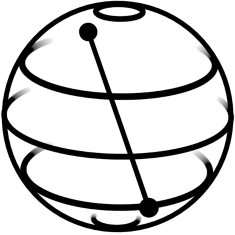

## CNOT

__Teorema de Universalidad:__ El conjunto de compuertas de un sólo qubit y CNOT forman un conjunto universal. 

In [60]:
import qiskit as q
from qiskit.quantum_info import Operator
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_histogram
# %pip install array_to_latex

from array_to_latex import to_ltx
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
def printarray(array,preface=""):
    printmd("$"+preface+to_ltx(array, frmt = '{:6.2f}', arraytype = 'pmatrix',print_out= False)+"$")

simulator = q.Aer.get_backend('aer_simulator')

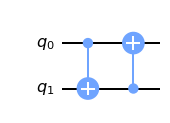

In [48]:
qc = q.QuantumCircuit(2)
# primero el qubit de control
# despues el qubit objetivo (target)
qc.cnot(0,1)
qc.cnot(1,0)
qc.draw("mpl")


In [49]:
printarray(Operator(qc).data,"CNOT_{1,0} CNOT_{0,1} = ")

$CNOT_{1,0} CNOT_{0,1} = \begin{pmatrix}
    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j\\
    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j
\end{pmatrix}$

## Ejercicio: Intercambio de CNOT

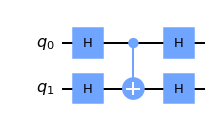

In [50]:
inter = q.QuantumCircuit(2)
inter.h([0,1])
inter.cnot(0,1)
inter.h([0,1])
inter.draw("mpl")

In [51]:
printarray(Operator(inter).data)

$\begin{pmatrix}
    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j
\end{pmatrix}$

In [54]:
inter2 = q.QuantumCircuit(2)
inter2.cnot(1,0)
inter2.draw("mpl")
printarray(Operator(inter2).data)

$\begin{pmatrix}
    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j
\end{pmatrix}$

### Ejercicio: Estados de Bell
$$ \left|B_{00}\right> = \frac{\left| 00\right>+\left| 11\right>}{\sqrt{2}}$$
$$ \left|B_{01}\right> = \frac{ ? \left| 00\right>+?\left| 11\right>}{\sqrt{2}}$$
$$ \left|B_{10}\right> = \frac{ ? \left| 01\right>+?\left| 10\right>}{\sqrt{2}}$$
$$ \left|B_{11}\right> = \frac{ ? \left| 01\right>+?\left| 10\right>}{\sqrt{2}}$$

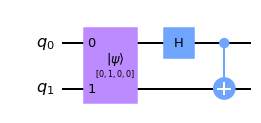

In [67]:
bell = q.QuantumCircuit(2)
bell.initialize([0,1,0,0])
bell.h(0)
bell.cnot(0,1)
bell.draw("mpl")
#bell.measure_all()


In [68]:
statesim = q.Aer.get_backend('statevector_simulator')
out = q.execute(bell,statesim).result().get_statevector()
printarray(out.data)


$\begin{pmatrix}
    0.71 +  -0.00j &    0.00 +   0.00j &    0.00 +   0.00j &  -0.71 +   0.00j
\end{pmatrix}$

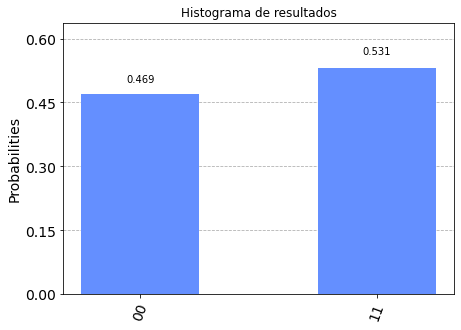

In [69]:
bell.measure_all()
trans = q.transpile(bell,simulator)
result = simulator.run(trans).result()
counts = result.get_counts(trans)
plot_histogram(counts, title='Histograma de resultados')

## Ejercicio CC Gates

In [74]:
import qiskit as q

ex = q.QuantumCircuit(3)

ex.ccx(0,1,2)


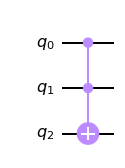

In [75]:
ex.draw("mpl")

In [90]:
csxsgate = q.circuit.library.CSXGate() 
csxinverse = csxsgate.inverse()

ex2 = q.QuantumCircuit(3)
ex2.csx(1,2)
ex2.cnot(0,1)
ex2.append(csxinverse,[1,2])
ex2.cnot(0,1)
ex2.csx(0,2)

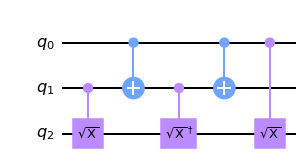

In [91]:
ex2.draw("mpl")

In [94]:
printarray(Operator(ex2).data)

$\begin{pmatrix}
    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    1.00 +  -0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +  -0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +  -0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +  -0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &  -0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +  -0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j
\end{pmatrix}$

In [95]:
printarray(Operator(ex).data)

$\begin{pmatrix}
    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j
\end{pmatrix}$

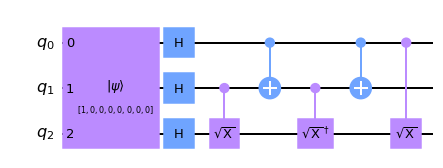

In [108]:
ex3 = q.QuantumCircuit(3)
ex3.initialize([1,0,0,0,0,0,0,0])
ex3.h(range(3))
ex3 = ex3.compose(ex2)
ex3.draw("mpl")



In [109]:

out = q.execute(ex3,statesim).result().get_statevector()
printarray(out.data)

$\begin{pmatrix}
    0.35 +   0.00j &    0.35 +  -0.00j &    0.35 +  -0.00j &    0.35 +   0.00j &    0.35 +   0.00j &    0.35 +  -0.00j &    0.35 +  -0.00j &    0.35 +   0.00j
\end{pmatrix}$

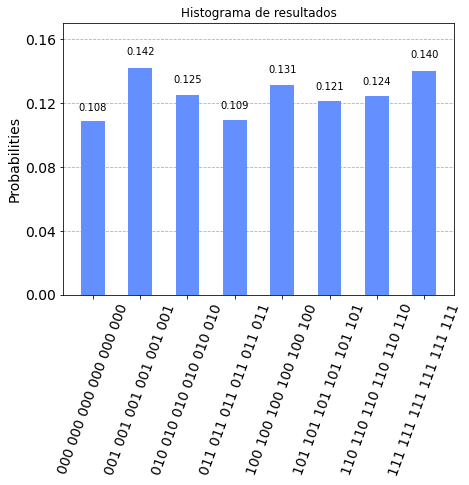

In [115]:
simulator = q.Aer.get_backend('aer_simulator')
ex3.measure_all()
trans = q.transpile(ex3,simulator)
result = simulator.run(trans).result()
counts = result.get_counts(trans)
plot_histogram(counts, title='Histograma de resultados')